# data analysis(data cleaning,data preprocessing,correlation)

# features engineering(label encoding(less than unique values 4),dummy variables other ,standard normalized scaling)

# model selection for classification(random forest ensembling technique,accuracy improving ,best parameters selection,recall and precission and f1-score)

In [1]:
# Importing Packages
import pandas as pd#data analysis
import numpy as np#numerical python
import matplotlib.pyplot as plt#visualization the plots
import seaborn as sns#visualiztion plot
import os#use for directory of the system
os.chdir(r"C:\machine learning\credit fraud")#import the directory

In [2]:
df=pd.read_csv(r"salary,satisfaction.csv",encoding='iso-8859-1')#not run directly we have to encode the utf code when data is encoded executed the data

In [3]:
df.shape#2946 data points and 83 columns in the data

(2946, 83)

In [4]:
df.info()#basic information of the data and the values inthe column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2946 non-null   int64  
 1   Target_Salary               2946 non-null   float64
 2   Target_Satisfied            2946 non-null   int64  
 3   LOAN_AMT                    2946 non-null   object 
 4   Business Title              2946 non-null   object 
 5   Civil Service Title         2946 non-null   object 
 6   Division/Work Unit          2946 non-null   object 
 7   Job Description             2946 non-null   object 
 8   Minimum Qual Requirements   2926 non-null   object 
 9   Preferred Skills            2553 non-null   object 
 10  Additional Information      1854 non-null   object 
 11  To Apply                    2945 non-null   object 
 12  Hours/Shift                 884 non-null    object 
 13  Residency Requirement       2942 

In [5]:
#size of the data more than 1900 kb data in the data set 5 float variables and 2 int variables and 76 categorical variables


In [6]:
df.columns# fetch columns names in the data

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'V

In [7]:
df.head()#top5 data 

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,...,"300 20th St S Birmingham, AL 35233 US",33.509722,-86.802756,NaN,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
2,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,NaN,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
3,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
4,68476807,35.00,1,"$10,400.00",Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,...,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,26.47.1555,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00


# There are 2 target variables in it. One is a categorical variable (Target Satisfaction) and another is a numeric variable (Target Salary). 



In [8]:
#dividing the data into 3 parts object,float,int

In [9]:
cat=df.select_dtypes("object").columns#fetch categorical columns in the data

In [10]:
# create a function fetch a missing values in the data

def missing(data):#
    per=data.isnull().sum()/len(data)*100
    miss=data.isnull().sum()
    missing_v=pd.concat([miss,per],keys=["missing","percentage"],axis=1)
    missing_val=missing_v[missing_v["missing"]>=1]#missing values in the data

    return missing_val

In [11]:
df_cat=df[cat]

In [12]:
df_per_mis=missing(df_cat).iloc[:,1]

In [13]:
missing_df_cat=df_per_mis.sort_values(ascending=False)

In [14]:
miss=missing_df_cat[missing_df_cat>=35]

In [15]:
miss_col=miss.index

In [16]:
#execute a loop all object values in the value counts in the data
for i in df[miss_col]:
    print(df[i].value_counts(dropna=False))

NaN                                                                      2725
I already had a full-time job as a developer when I began the program     112
Immediately after graduating                                               36
One to three months                                                        25
Less than a month                                                          19
Four to six months                                                         11
Six months to a year                                                        9
Longer than a year                                                          5
I havent gotten a developer job                                            4
Name: TimeAfterBootcamp, dtype: int64
NaN       2610
19-Apr     335
19-Mar       1
Name: next_pymnt_d, dtype: int64
NaN               2231
#ERROR!             74
2125557818          49
40.67.8555          49
07-98 9555          49
6505555787          25
6505556809          25
90-224 8555         2

In [17]:
df.drop(columns=miss_col,inplace=True)#drop some missing variables in the data 

In [18]:
df.shape

(2946, 71)

In [19]:
cat=df.select_dtypes("object").columns

In [20]:
cat_mis=missing(df[cat]).iloc[:,1].sort_values(ascending=False)
cat_mis.index

Index(['Email', 'Methodology', 'AIDangerous', 'CommunicationTools', 'Age',
       'TimeFullyProductive', 'AIResponsible', 'PlatformWorkedWith',
       'AIInteresting', 'UpdateCV', 'EducationTypes', 'DatabaseWorkedWith',
       'AgreeDisagree2', 'AgreeDisagree1', 'AgreeDisagree3', 'AIFuture',
       'LanguageDesireNextYear', 'CheckInCode', 'VersionControl', 'IDE',
       'OperatingSystem', 'website', 'officeaddress', 'LanguageWorkedWith',
       'HopeFiveYears', 'LastNewJob', 'JobSearchStatus', 'YearsCodingProf',
       'Preferred Skills', 'UndergradMajor', 'homeaddress', 'title',
       'FormalEducation', 'DevType', 'Minimum Qual Requirements',
       'Process Date', 'Posting Updated', 'Posting Date',
       'Residency Requirement', 'YearsCoding', 'To Apply',
       'your_favoritearticle_today'],
      dtype='object')

In [21]:
#in object columns where no. of unique values is less than 15
n_unique=[feature for feature in cat_mis.index if df[feature].nunique()<15]

In [22]:
print("total length of variables where unique values is less than 15: ",len(n_unique))

total length of variables where unique values is less than 15:  21


In [23]:
for i in n_unique:
    print(df[i].value_counts(dropna=False))

NaN                                                                          946
Algorithms making important decisions                                        598
Artificial intelligence surpassing human intelligence ("the singularity")    528
Evolving definitions of "fairness" in algorithmic versus human decisions     482
Increasing automation of jobs                                                392
Name: AIDangerous, dtype: int64
25 - 34 years old     1117
NaN                    919
18 - 24 years old      421
35 - 44 years old      364
45 - 54 years old       93
55 - 64 years old       23
Under 18 years old       9
Name: Age, dtype: int64
One to three months      909
NaN                      894
Less than a month        643
Three to six months      347
Six to nine months       111
Nine months to a year     25
More than a year          17
Name: TimeFullyProductive, dtype: int64
The developers or the people creating the AI    992
NaN                                             876
A g

In [24]:
print(n_unique)

['AIDangerous', 'Age', 'TimeFullyProductive', 'AIResponsible', 'AIInteresting', 'UpdateCV', 'AgreeDisagree2', 'AgreeDisagree1', 'AgreeDisagree3', 'AIFuture', 'CheckInCode', 'OperatingSystem', 'HopeFiveYears', 'LastNewJob', 'JobSearchStatus', 'YearsCodingProf', 'UndergradMajor', 'title', 'FormalEducation', 'Process Date', 'YearsCoding']


In [25]:
#create a function values count per column
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [26]:
count_values_in_column(df,"Age")#funname,dataname,column name

,Total,Percentage
25 - 34 years old,1117,37.92
NaN,919,31.19
18 - 24 years old,421,14.29
35 - 44 years old,364,12.36
45 - 54 years old,93,3.16
55 - 64 years old,23,0.78
Under 18 years old,9,0.31


In [27]:
df["Age"]=df["Age"].replace(["18 - 24 years old","25 - 34 years old",
                             "35 - 44 years old","45 - 54 years old","55 - 64 years old",
                           "Under 18 years old" ],[1,2,3,4,5,0])

In [28]:
count_values_in_column(df,"Age")

,Total,Percentage
2.0,1117,37.92
NaN,919,31.19
1.0,421,14.29
3.0,364,12.36
4.0,93,3.16
5.0,23,0.78
0.0,9,0.31


# age colum 0 means below 18
# 1 means 18-24 2means 25-34 3 means 35-44 4 means 45-54 5 means 55-64 

In [29]:
df["Age"].fillna("na",inplace=True)

In [30]:
count_values_in_column(df,"Age")

,Total,Percentage
2.0,1117,37.92
na,919,31.19
1.0,421,14.29
3.0,364,12.36
4.0,93,3.16
5.0,23,0.78
0.0,9,0.31


In [31]:
df["Age"]=df["Age"].replace(["na"],[6])

In [32]:
count_values_in_column(df,"Age")

,Total,Percentage
2.0,1117,37.92
6.0,919,31.19
1.0,421,14.29
3.0,364,12.36
4.0,93,3.16
5.0,23,0.78
0.0,9,0.31


In [33]:
df["Age"]=df["Age"].astype("int64")

In [34]:
df["Age"].dtype

dtype('int64')

In [35]:
count_values_in_column(df,"Age")

,Total,Percentage
2,1117,37.92
6,919,31.19
1,421,14.29
3,364,12.36
4,93,3.16
5,23,0.78
0,9,0.31


In [36]:
n_unique

['AIDangerous',
 'Age',
 'TimeFullyProductive',
 'AIResponsible',
 'AIInteresting',
 'UpdateCV',
 'AgreeDisagree2',
 'AgreeDisagree1',
 'AgreeDisagree3',
 'AIFuture',
 'CheckInCode',
 'OperatingSystem',
 'HopeFiveYears',
 'LastNewJob',
 'JobSearchStatus',
 'YearsCodingProf',
 'UndergradMajor',
 'title',
 'FormalEducation',
 'Process Date',
 'YearsCoding']

In [37]:
count_values_in_column(df,"TimeFullyProductive")

,Total,Percentage
One to three months,909,30.86
NaN,894,30.35
Less than a month,643,21.83
Three to six months,347,11.78
Six to nine months,111,3.77
Nine months to a year,25,0.85
More than a year,17,0.58


In [38]:
count_values_in_column(df,"Target_Satisfied")

,Total,Percentage
0,2327,78.99
1,619,21.01


In [39]:
#object data is very puzzled or redundand feature we have to complex and reduced the values of the data
#we have to replacing the values code see here
df["TimeFullyProductive"]=df["TimeFullyProductive"].replace(["Less than a month","One to three months",
                                                            "Three to six months",
                                                             "Six to nine months",
                                                            "Nine months to a year",
                                                            "More than a year"],["3-months","3-months",
                                                                                "6-months","9-months","12-months",
                                                                                "more than 1 year"])

In [40]:
count_values_in_column(df,"TimeFullyProductive")

,Total,Percentage
3-months,1552,52.68
NaN,894,30.35
6-months,347,11.78
9-months,111,3.77
12-months,25,0.85
more than 1 year,17,0.58


In [41]:
count_values_in_column(df,"CheckInCode")

,Total,Percentage
Multiple times per day,1485,50.41
NaN,627,21.28
A few times per week,406,13.78
Once a day,212,7.20
Weekly or a few times per month,139,4.72
Less than once per month,51,1.73
Never,26,0.88


In [42]:
print(n_unique)

['AIDangerous', 'Age', 'TimeFullyProductive', 'AIResponsible', 'AIInteresting', 'UpdateCV', 'AgreeDisagree2', 'AgreeDisagree1', 'AgreeDisagree3', 'AIFuture', 'CheckInCode', 'OperatingSystem', 'HopeFiveYears', 'LastNewJob', 'JobSearchStatus', 'YearsCodingProf', 'UndergradMajor', 'title', 'FormalEducation', 'Process Date', 'YearsCoding']


In [43]:
#dropping some variables in the data
df.drop(columns=['AIDangerous','AIResponsible', 'AIInteresting', 'UpdateCV', 'AgreeDisagree2', 'AgreeDisagree1', 'AgreeDisagree3', 'AIFuture',
               'CheckInCode','HopeFiveYears', 'LastNewJob', 'JobSearchStatus', 'YearsCodingProf','Process Date', 'YearsCoding' ],inplace=True)               

In [44]:
df.shape

(2946, 56)

In [45]:
df.select_dtypes("object").columns

Index(['LOAN_AMT', 'Business Title', 'Civil Service Title',
       'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements',
       'Preferred Skills', 'To Apply', 'Residency Requirement', 'Posting Date',
       'Posting Updated', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'CommunicationTools', 'TimeFullyProductive',
       'EducationTypes', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'PlatformWorkedWith', 'IDE', 'OperatingSystem',
       'Methodology', 'VersionControl', 'term', 'loan_status', 'pymnt_plan',
       'orignal_website_directory', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'Time', 'your_favoritearticle_today', 'url', 'Email', 'homeaddress',
       'officeaddress', 'website', 'dateAdded', 'previousaddress', 'phones',
       'CrimeTime'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2946 non-null   int64  
 1   Target_Salary               2946 non-null   float64
 2   Target_Satisfied            2946 non-null   int64  
 3   LOAN_AMT                    2946 non-null   object 
 4   Business Title              2946 non-null   object 
 5   Civil Service Title         2946 non-null   object 
 6   Division/Work Unit          2946 non-null   object 
 7   Job Description             2946 non-null   object 
 8   Minimum Qual Requirements   2926 non-null   object 
 9   Preferred Skills            2553 non-null   object 
 10  To Apply                    2945 non-null   object 
 11  Residency Requirement       2942 non-null   object 
 12  Posting Date                2942 non-null   object 
 13  Posting Updated             2942 

In [47]:
cat_missing=missing(df[df.select_dtypes("object").columns])
cat_missing.index

Index(['Minimum Qual Requirements', 'Preferred Skills', 'To Apply',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'FormalEducation', 'UndergradMajor', 'DevType', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'IDE', 'OperatingSystem', 'Methodology', 'VersionControl', 'title',
       'your_favoritearticle_today', 'Email', 'homeaddress', 'officeaddress',
       'website'],
      dtype='object')

In [48]:
for i in cat_missing.index:
    print(i)
    print(df[i].value_counts(dropna=False))

Minimum Qual Requirements
1. A baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above; or  2. High school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above; or  3. Education and/or experience which is equivalent to "1" or "2" above. However, all candidates must have at least one year of experience as described in "1" above.                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [49]:
df.drop(columns=['Minimum Qual Requirements', 'Preferred Skills', 'To Apply','Residency Requirement', 'Posting Date', 'Posting Updated',
                'CommunicationTools',
        'EducationTypes', 'LanguageWorkedWith',
        'PlatformWorkedWith',
        'OperatingSystem',  'VersionControl','your_favoritearticle_today', 'Email', 'homeaddress', 'officeaddress',
       'website'],inplace=True)

In [50]:
cat_missing=missing(df[df.select_dtypes("object").columns])

In [51]:
for i in cat_missing.index:#index use for fetch the index of columns names in the data
    print(df[i].value_counts())

Bachelors degree (BA, BS, B.Eng., etc.)                                              1442
Masters degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64
Computer science, computer engineering, or software engineering          1698
Information systems, information technology, or system administrati

In [52]:
cat_missing.index#columns names in the data 

Index(['FormalEducation', 'UndergradMajor', 'DevType', 'TimeFullyProductive',
       'LanguageDesireNextYear', 'DatabaseWorkedWith', 'IDE', 'Methodology',
       'title'],
      dtype='object')

In [53]:
count_values_in_column(df,"FormalEducation")

,Total,Percentage
"Bachelors degree (BA, BS, B.Eng., etc.)",1442,48.95
"Masters degree (MA, MS, M.Eng., MBA, etc.)",716,24.30
Some college/university study without earning a degree,319,10.83
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",179,6.08
Associate degree,92,3.12
"Other doctoral degree (Ph.D, Ed.D., etc.)",75,2.55
NaN,52,1.77
"Professional degree (JD, MD, etc.)",43,1.46
Primary/elementary school,17,0.58
I never completed any formal education,11,0.37


In [54]:
#replacing the values in the data
df["FormalEducation"]=df["FormalEducation"].replace(["Bachelors degree (BA, BS, B.Eng., etc.)",
                                                    "Masters degree (MA, MS, M.Eng., MBA, etc.)",
                                                    "Some college/university study without earning a degree",
                                                    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
                                                    "Associate degree",
                                                    "Other doctoral degree (Ph.D, Ed.D., etc.)",
                                                    "Professional degree (JD, MD, etc.)",
                                                    "Primary/elementary school",
                                                    "I never completed any formal education"],["undergraduate","post-graduate",
                                                                                              "pursuing-undergraduate/post-graduate",
                                                                                              "schooling degree","undergraduate","PHD",
                                                                                              "PHD","schooling degree",
                                                                                              "unemployeed"])

In [55]:
count_values_in_column(df,"FormalEducation")

,Total,Percentage
undergraduate,1534,52.07
post-graduate,716,24.30
pursuing-undergraduate/post-graduate,319,10.83
schooling degree,196,6.65
PHD,118,4.01
NaN,52,1.77
unemployeed,11,0.37


In [56]:
df.fillna({"FormalEducation":"na"},inplace=True)#fill missing values in the data

In [57]:
count_values_in_column(df,"FormalEducation")


,Total,Percentage
undergraduate,1534,52.07
post-graduate,716,24.30
pursuing-undergraduate/post-graduate,319,10.83
schooling degree,196,6.65
PHD,118,4.01
na,52,1.77
unemployeed,11,0.37


In [58]:
cat_missing.index

Index(['FormalEducation', 'UndergradMajor', 'DevType', 'TimeFullyProductive',
       'LanguageDesireNextYear', 'DatabaseWorkedWith', 'IDE', 'Methodology',
       'title'],
      dtype='object')

In [59]:
count_values_in_column(df,"UndergradMajor")

,Total,Percentage
"Computer science, computer engineering, or software engineering",1698,57.64
NaN,322,10.93
"Information systems, information technology, or system administration",247,8.38
"Another engineering discipline (ex. civil, electrical, mechanical)",205,6.96
"A natural science (ex. biology, chemistry, physics)",109,3.70
Mathematics or statistics,86,2.92
"A business discipline (ex. accounting, finance, marketing)",65,2.21
Web development or web design,64,2.17
"A humanities discipline (ex. literature, history, philosophy)",48,1.63
"Fine arts or performing arts (ex. graphic design, music, studio art)",38,1.29


In [60]:
df["UndergradMajor"]=df["UndergradMajor"].replace(["Computer science, computer engineering, or software engineering",
                                                  "Information systems, information technology, or system administration",
                                                  "Web development or web design",
                                                  "Another engineering discipline (ex. civil, electrical, mechanical)",
                                                  "A health science (ex. nursing, pharmacy, radiology)",
                                                  "A natural science (ex. biology, chemistry, physics)",
                                                  "A business discipline (ex. accounting, finance, marketing)",
                                                 "A humanities discipline (ex. literature, history, philosophy)",
                                                  "A social science (ex. anthropology, psychology, political science)",
                                                  "Fine arts or performing arts (ex. graphic design, music, studio art)",
                                                  ],["information technology","information technology",
                                                     "information technology","engineering(mechanical,electronics,civil)",
                                                    "healthscience","healthscience","businessdomain","socialscience",
                                                    "socialscience","arts(graphics designing,music,art)"])

In [61]:
count_values_in_column(df,"UndergradMajor")

,Total,Percentage
information technology,2009,68.19
NaN,322,10.93
"engineering(mechanical,electronics,civil)",205,6.96
healthscience,112,3.80
Mathematics or statistics,86,2.92
socialscience,86,2.92
businessdomain,65,2.21
"arts(graphics designing,music,art)",38,1.29
I never declared a major,23,0.78


In [62]:
df.fillna({"UndergradMajor":"na"},inplace=True)

In [63]:
cat_missing.index

Index(['FormalEducation', 'UndergradMajor', 'DevType', 'TimeFullyProductive',
       'LanguageDesireNextYear', 'DatabaseWorkedWith', 'IDE', 'Methodology',
       'title'],
      dtype='object')

In [64]:
count_values_in_column(df,"DevType")

,Total,Percentage
Full-stack developer,225,7.64
Back-end developer,219,7.43
Back-end developer;Front-end developer;Full-stack developer,180,6.11
Mobile developer,141,4.79
Back-end developer;Full-stack developer,120,4.07
...,...,...
Back-end developer;Full-stack developer;Game or graphics developer;Mobile developer;QA or test developer;System administrator,1,0.03
Data or business analyst;Engineering manager;Product manager,1,0.03
Back-end developer;Data or business analyst;Database administrator;DevOps specialist;Front-end developer;Full-stack developer;QA or test developer;System administrator,1,0.03
Desktop or enterprise applications developer;Game or graphics developer;Mobile developer,1,0.03


In [65]:
df.drop(columns=["DevType"],inplace=True)

In [66]:
count_values_in_column(df,"LanguageDesireNextYear")

,Total,Percentage
NaN,667,22.64
Python,28,0.95
C#,28,0.95
C#;JavaScript;SQL;TypeScript;HTML;CSS,22,0.75
Java,20,0.68
...,...,...
C++;C#;JavaScript;SQL;HTML;CSS,1,0.03
C#;Java;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,1,0.03
C++;Python;Ruby;TypeScript,1,0.03
Erlang;Go;Kotlin,1,0.03


In [67]:
cat_missing.index

Index(['FormalEducation', 'UndergradMajor', 'DevType', 'TimeFullyProductive',
       'LanguageDesireNextYear', 'DatabaseWorkedWith', 'IDE', 'Methodology',
       'title'],
      dtype='object')

In [68]:
count_values_in_column(df,"title")

,Total,Percentage
Debt consolidation,1699,57.67
Credit card refinancing,699,23.73
Home improvement,156,5.30
Other,141,4.79
NaN,64,2.17
Major purchase,55,1.87
Business,33,1.12
Car financing,30,1.02
Medical expenses,21,0.71
Home buying,17,0.58


In [69]:
df["title"]=df["title"].replace(["Home improvement","Major purchase","Business",
                                "Home buying","Moving and relocation",
                                "Car financing","Green loan","Medical expenses"],["Personal-loan","Personal-loan",
                                                                       "Personal-loan","Personal-loan",
                                                                       "Personal-loan","auto-loan",
                                                              "Other","personal-loan"])

In [70]:
df.fillna({"title":"Other"},inplace=True)

In [71]:
count_values_in_column(df,"title")

,Total,Percentage
Debt consolidation,1699,57.67
Credit card refinancing,699,23.73
Personal-loan,274,9.30
Other,206,6.99
auto-loan,30,1.02
personal-loan,21,0.71
Vacation,17,0.58


In [72]:
df["title"]=df["title"].replace(["personal-loan","Vacation"],["Personal-loan","Personal-loan"])

In [73]:
count_values_in_column(df,"title")

,Total,Percentage
Debt consolidation,1699,57.67
Credit card refinancing,699,23.73
Personal-loan,312,10.59
Other,206,6.99
auto-loan,30,1.02


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target_Salary              2946 non-null   float64
 2   Target_Satisfied           2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   object 
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   FormalEducation            2946 non-null   object 
 9   UndergradMajor             2946 non-null   object 
 10  CompanySize                2946 non-null   object 
 11  TimeFullyProductive        2052 non-null   object 
 12  LanguageDesireNextYear     2279 non-null   object 
 13  DatabaseWorkedWith         2130 non-null   objec

In [75]:
cat_missing=missing(df[df.select_dtypes("object").columns])
cat_missing

,missing,percentage
TimeFullyProductive,894,30.346232
LanguageDesireNextYear,667,22.640869
DatabaseWorkedWith,816,27.698574
IDE,586,19.891378
Methodology,955,32.416836


In [76]:
cat_in=cat_missing.index
cat_in

Index(['TimeFullyProductive', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'IDE', 'Methodology'],
      dtype='object')

In [77]:
df.drop(columns=['LanguageDesireNextYear', 'DatabaseWorkedWith',
       'IDE', 'Methodology'],inplace=True)

In [78]:
df.shape

(2946, 34)

In [79]:
missing(df[df.select_dtypes("object").columns])

,missing,percentage
TimeFullyProductive,894,30.346232


In [80]:
count_values_in_column(df,"TimeFullyProductive")

,Total,Percentage
3-months,1552,52.68
NaN,894,30.35
6-months,347,11.78
9-months,111,3.77
12-months,25,0.85
more than 1 year,17,0.58


In [81]:
df.fillna({"TimeFullyProductive":"na"},inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target_Salary              2946 non-null   float64
 2   Target_Satisfied           2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   object 
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   FormalEducation            2946 non-null   object 
 9   UndergradMajor             2946 non-null   object 
 10  CompanySize                2946 non-null   object 
 11  TimeFullyProductive        2946 non-null   object 
 12  Age                        2946 non-null   int64  
 13  term                       2946 non-null   objec

In [83]:
missing(df)

,missing,percentage
latitude,317,10.760353
longitude,317,10.760353


In [84]:
df.columns

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'FormalEducation', 'UndergradMajor', 'CompanySize',
       'TimeFullyProductive', 'Age', 'term', 'loan_status', 'pymnt_plan',
       'orignal_website_directory', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'Time', 'url', 'latitude',
       'longitude', 'dateAdded', 'previousaddress', 'phones', 'CrimeTime'],
      dtype='object')

In [85]:
cat=df.select_dtypes("object").columns

In [86]:
print("length of categorical vcariables are : ",len(cat))

length of categorical vcariables are :  26


In [87]:
for i in cat:
    print(df[i].value_counts())

$15,000.00     203
$10,000.00     188
$20,000.00     180
$12,000.00     158
$35,000.00     136
              ... 
$17,750.00       1
$11,875.00       1
$15,975.00       1
$7,325.00        1
$30,600.00       1
Name: LOAN_AMT, Length: 492, dtype: int64
Assistant Civil Engineer                                    33
Project Manager                                             29
College Aide                                                24
Construction Project Manager                                22
ACCOUNTABLE MANAGER                                         20
                                                            ..
Exemptions Data Analyst                                      1
Union Deduction Analyst                                      1
Systems Engineer                                             1
Project Development Coordinator for Manhattan Ballfields     1
Supervisor Watershed Maintenance I                           1
Name: Business Title, Length: 1244, dtype: int64
COMMUNI

In [88]:
import re#regex for text data

In [89]:
def find_nonalp(text):#remove symbol in the data
    line = re.findall("[(\w+)]",text)
    return line

In [90]:
def only_words(text):#extra symbol in the data
    line=re.findall(r'\b[\d\.]+\b', text)
    return " ".join(line)

In [91]:
s="34000 670000 890.00 ghdjjd 87000"
only_words(s)

'34000 670000 890.00 87000'

In [92]:
df['loan_amountin(dollar_1)']=df['LOAN_AMT'].apply(lambda x: only_words(x))

In [93]:
df['loan_amountin(dollar_1)']=df['loan_amountin(dollar_1)'].str.replace(" ","")#remove the blank spaces in the data

In [94]:
df['loan_amountin(dollar_1)']

0        3600.00
1       24700.00
2       20000.00
3       35000.00
4       10400.00
          ...   
2941    14000.00
2942    18675.00
2943    24000.00
2944     2500.00
2945    10000.00
Name: loan_amountin(dollar_1), Length: 2946, dtype: object

In [95]:
df[["LOAN_AMT","loan_amountin(dollar_1)"]]

,LOAN_AMT,loan_amountin(dollar_1)
0,"$3,600.00",3600.00
1,"$24,700.00",24700.00
2,"$20,000.00",20000.00
3,"$35,000.00",35000.00
4,"$10,400.00",10400.00
...,...,...
2941,"$14,000.00",14000.00
2942,"$18,675.00",18675.00
2943,"$24,000.00",24000.00
2944,"$2,500.00",2500.00


In [96]:
df.columns

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'FormalEducation', 'UndergradMajor', 'CompanySize',
       'TimeFullyProductive', 'Age', 'term', 'loan_status', 'pymnt_plan',
       'orignal_website_directory', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'Time', 'url', 'latitude',
       'longitude', 'dateAdded', 'previousaddress', 'phones', 'CrimeTime',
       'loan_amountin(dollar_1)'],
      dtype='object')

In [98]:
df.columns

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'FormalEducation', 'UndergradMajor', 'CompanySize',
       'TimeFullyProductive', 'Age', 'term', 'loan_status', 'pymnt_plan',
       'orignal_website_directory', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'Time', 'url', 'latitude',
       'longitude', 'dateAdded', 'previousaddress', 'phones', 'CrimeTime',
       'loan_amountin(dollar_1)'],
      dtype='object')

In [99]:
df["loan_amountin(dollar_1)"]=df["loan_amountin(dollar_1)"].astype({"loan_amountin(dollar_1)":"float64"})

In [100]:
df["loan_amountin(dollar_1)"].dtype

dtype('float64')

In [101]:
cat

Index(['LOAN_AMT', 'Business Title', 'Civil Service Title',
       'Division/Work Unit', 'Job Description', 'FormalEducation',
       'UndergradMajor', 'CompanySize', 'TimeFullyProductive', 'term',
       'loan_status', 'pymnt_plan', 'orignal_website_directory', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d', 'Time', 'url', 'dateAdded', 'previousaddress',
       'phones', 'CrimeTime'],
      dtype='object')

In [102]:
count_values_in_column(df,"loan_status")

,Total,Percentage
Fully Paid,2154,73.12
Charged Off,456,15.48
Current,319,10.83
Late (31-120 days),14,0.48
In Grace Period,2,0.07
Late (16-30 days),1,0.03


In [103]:
df["loan_status"]=df["loan_status"].replace(["Charged Off","Late (31-120 days)","Late (16-30 days)",
                                            "In Grace Period"],["Fully Paid","Late","Late","Late"])

In [104]:
count_values_in_column(df,"loan_status")

,Total,Percentage
Fully Paid,2610,88.59
Current,319,10.83
Late,17,0.58


In [105]:
df.drop(columns=["Business Title","Civil Service Title",'Division/Work Unit', 'Job Description',
                'CompanySize','orignal_website_directory', 'purpose',
                'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d', 'Time', 'url', 'dateAdded', 'previousaddress',
       'phones', 'CrimeTime'],inplace=True)

In [106]:
df.shape

(2946, 17)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2946 non-null   int64  
 1   Target_Salary            2946 non-null   float64
 2   Target_Satisfied         2946 non-null   int64  
 3   LOAN_AMT                 2946 non-null   object 
 4   FormalEducation          2946 non-null   object 
 5   UndergradMajor           2946 non-null   object 
 6   TimeFullyProductive      2946 non-null   object 
 7   Age                      2946 non-null   int64  
 8   term                     2946 non-null   object 
 9   loan_status              2946 non-null   object 
 10  pymnt_plan               2946 non-null   object 
 11  title                    2946 non-null   object 
 12  dti                      2946 non-null   float64
 13  last_pymnt_amnt          2946 non-null   float64
 14  latitude                

In [108]:
missing(df)

,missing,percentage
latitude,317,10.760353
longitude,317,10.760353


In [109]:
df.drop(columns=["latitude","longitude"],inplace=True)

In [ ]:
#correlation of the data

In [110]:
pd.set_option("precision",3)
df.corr().style.background_gradient(cmap="coolwarm")

,id,Target_Salary,Target_Satisfied,Age,dti,last_pymnt_amnt,loan_amountin(dollar_1)
id,1.000,-0.010,0.017,-0.005,0.037,-0.021,0.004
Target_Salary,-0.010,1.000,0.008,-0.015,0.002,0.009,-0.005
Target_Satisfied,0.017,0.008,1.000,-0.014,0.001,-0.049,-0.053
Age,-0.005,-0.015,-0.014,1.000,-0.002,0.009,0.010
dti,0.037,0.002,0.001,-0.002,1.000,-0.051,0.038
last_pymnt_amnt,-0.021,0.009,-0.049,0.009,-0.051,1.000,0.435
loan_amountin(dollar_1),0.004,-0.005,-0.053,0.010,0.038,0.435,1.000


In [111]:
df.drop(columns=["id"],inplace=True)

In [112]:
pd.set_option("precision",3)
df.corr().style.background_gradient(cmap="coolwarm")#mostly negative corelation in the data

,Target_Salary,Target_Satisfied,Age,dti,last_pymnt_amnt,loan_amountin(dollar_1)
Target_Salary,1.000,0.008,-0.015,0.002,0.009,-0.005
Target_Satisfied,0.008,1.000,-0.014,0.001,-0.049,-0.053
Age,-0.015,-0.014,1.000,-0.002,0.009,0.010
dti,0.002,0.001,-0.002,1.000,-0.051,0.038
last_pymnt_amnt,0.009,-0.049,0.009,-0.051,1.000,0.435
loan_amountin(dollar_1),-0.005,-0.053,0.010,0.038,0.435,1.000


In [113]:
#data cleaning complete

In [114]:
df.head(3)

,Target_Salary,Target_Satisfied,LOAN_AMT,FormalEducation,UndergradMajor,TimeFullyProductive,Age,term,loan_status,pymnt_plan,title,dti,last_pymnt_amnt,loan_amountin(dollar_1)
0,42405.00,0,"$3,600.00",undergraduate,Mathematics or statistics,3-months,2,36 months,Fully Paid,n,Debt consolidation,5.91,122.67,3600.0
1,60740.00,1,"$24,700.00",undergraduate,healthscience,3-months,3,36 months,Fully Paid,n,Personal-loan,16.06,926.35,24700.0
2,51907.68,0,"$20,000.00",undergraduate,information technology,na,6,60 months,Fully Paid,n,Other,10.78,15813.30,20000.0


In [115]:
cat=df.select_dtypes("object").columns

In [116]:
cat_lab=[feature for feature in cat if df[feature].nunique()<=4]
for i in cat_lab:
    print(i)

term
loan_status
pymnt_plan


In [117]:
cat_lab

['term', 'loan_status', 'pymnt_plan']

In [ ]:
#albel encoding of some variables

In [118]:
from sklearn import preprocessing 
label_en=preprocessing.LabelEncoder()
#combine_df["ACCOUNT_STATUS"]=label.fit_transform(combine_df["ACCOUNT_STATUS"])
for lab in cat_lab:
    df[lab]=label_en.fit_transform(df[lab])

In [119]:
df

,Target_Salary,Target_Satisfied,LOAN_AMT,FormalEducation,UndergradMajor,TimeFullyProductive,Age,term,loan_status,pymnt_plan,title,dti,last_pymnt_amnt,loan_amountin(dollar_1)
0,42405.00,0,"$3,600.00",undergraduate,Mathematics or statistics,3-months,2,0,1,0,Debt consolidation,5.91,122.67,3600.0
1,60740.00,1,"$24,700.00",undergraduate,healthscience,3-months,3,0,1,0,Personal-loan,16.06,926.35,24700.0
2,51907.68,0,"$20,000.00",undergraduate,information technology,na,6,1,1,0,Other,10.78,15813.30,20000.0
3,51907.68,0,"$35,000.00",undergraduate,information technology,6-months,3,1,0,0,Debt consolidation,17.06,829.90,35000.0
4,35.00,1,"$10,400.00",pursuing-undergraduate/post-graduate,information technology,6-months,1,1,1,0,Personal-loan,25.37,10128.96,10400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,67757.00,0,"$14,000.00",undergraduate,information technology,6-months,2,1,0,0,Debt consolidation,15.54,321.71,14000.0
2942,67757.00,1,"$18,675.00",post-graduate,"engineering(mechanical,electronics,civil)",3-months,2,1,1,0,Debt consolidation,26.74,14248.32,18675.0
2943,54100.00,0,"$24,000.00",undergraduate,information technology,3-months,1,0,1,0,Credit card refinancing,23.43,23684.51,24000.0
2944,54100.00,0,"$2,500.00",undergraduate,information technology,3-months,1,0,1,0,Debt consolidation,26.55,170.36,2500.0


In [ ]:
#create dummy variables in the data

In [120]:
df1=pd.get_dummies(df)#dummy variable

In [121]:
df1.shape

(2946, 528)

In [122]:
df1.columns

Index(['Target_Salary', 'Target_Satisfied', 'Age', 'term', 'loan_status',
       'pymnt_plan', 'dti', 'last_pymnt_amnt', 'loan_amountin(dollar_1)',
       'LOAN_AMT_$1,000.00 ',
       ...
       'TimeFullyProductive_3-months', 'TimeFullyProductive_6-months',
       'TimeFullyProductive_9-months', 'TimeFullyProductive_more than 1 year',
       'TimeFullyProductive_na', 'title_Credit card refinancing',
       'title_Debt consolidation', 'title_Other', 'title_Personal-loan',
       'title_auto-loan'],
      dtype='object', length=528)

In [123]:
x=df1[["Target_Salary"]].columns#dependent for regression or continous
x1=df1[["Target_Satisfied"]].columns#dependent for classification
y=df1.iloc[:,2:].columns#independent
y1=df1.iloc[:,2:].columns#independent

In [124]:
from sklearn.metrics import roc_curve, auc#use roc and auc curve area under curve 
from sklearn.metrics import confusion_matrix#confusion matrix for true and false positive rate
from sklearn.metrics import classification_report#classification report for fetch accuracy and f1 score,recall and precision

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #ensemble for random forest
import warnings
warnings.filterwarnings("ignore")

In [125]:
train,test=train_test_split(df1,test_size=0.2, random_state=0)#splitting the data 80:20 part

In [126]:
print("training indepent feature for regression ",train[y].shape)
print("training depent variable for regression",train[x].shape)
print("testing independent variable for regression",test[y].shape)
print("testing dependent variable for regression",test[x].shape)

training indepent feature for regression  (2356, 526)
training depent variable for regression (2356, 1)
testing independent variable for regression (590, 526)
testing dependent variable for regression (590, 1)


In [127]:
print("training indepent feature for classification ",train[y1].shape)
print("training depent variable for classification",train[x1].shape)
print("testing independent variable for classification",test[y1].shape)
print("testing dependent variable for classification",test[x1].shape)

training indepent feature for classification  (2356, 526)
training depent variable for classification (2356, 1)
testing independent variable for classification (590, 526)
testing dependent variable for classification (590, 1)


In [128]:
ensemble=RandomForestClassifier()#variables selection for default random forest

In [129]:
train[x1]

,Target_Satisfied
2020,0
215,0
2701,0
997,0
392,0
...,...
763,1
835,0
1653,0
2607,1


In [130]:
ensemble.fit(train[y1],train[x1])#fitt the model while training

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
#while calculating the accuracy
print("training accuracy ",ensemble.score(train[y1],train[x1]))
print("testing accuracy ",ensemble.score(test[y1],test[x1]))

training accuracy  1.0
testing accuracy  0.7661016949152543


# we have to see the data in normal random foresest mode but training and testing accuracy is huge difference we have work on these

In [ ]:
#standard scaling used for normalizing the data mean and standard deviation where mean 0 and sd 1

In [141]:
from sklearn.preprocessing import StandardScaler#import the package the standard scaling data
sc=StandardScaler()#

In [142]:
df1.columns

Index(['Target_Salary', 'Target_Satisfied', 'Age', 'term', 'loan_status',
       'pymnt_plan', 'dti', 'last_pymnt_amnt', 'loan_amountin(dollar_1)',
       'LOAN_AMT_$1,000.00 ',
       ...
       'TimeFullyProductive_3-months', 'TimeFullyProductive_6-months',
       'TimeFullyProductive_9-months', 'TimeFullyProductive_more than 1 year',
       'TimeFullyProductive_na', 'title_Credit card refinancing',
       'title_Debt consolidation', 'title_Other', 'title_Personal-loan',
       'title_auto-loan'],
      dtype='object', length=528)

In [144]:
#scaling of data for numerical variables that;s continous
df2=["Age",'dti', 'last_pymnt_amnt', 'loan_amountin(dollar_1)']

In [145]:
df1[df2]=sc.fit_transform(df1[df2])# scaling and transform the data

In [146]:
df2=df1

In [147]:
train,test=train_test_split(df2,test_size=0.2, random_state=0)#splitting the data

In [148]:
ensemble.fit(train[y1],train[x1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
print("training accuracy ",ensemble.score(train[y1],train[x1]))
print("testing accuracy ",ensemble.score(test[y1],test[x1]))

training accuracy  1.0
testing accuracy  0.7661016949152543


In [150]:
#we have to see than that after scaling of data not much difference in accuracy 
#we have work on parameters of random forest model
#selecting the best parament while performing the good accuracy of model while training andd testing

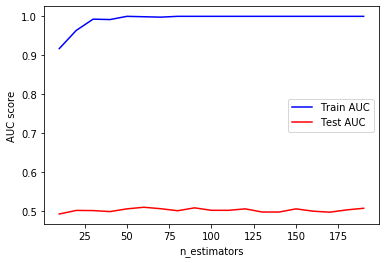

In [152]:

n_estimators = np.arange(10,200,10)#no of trees selected in random forest
train_results = []#make to empty list
test_results = []
for estimator in n_estimators:#create loop
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(train[y1],train[x1])#train the data
    train_pred = rf.predict(train[y1])#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train[x1], train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test[y1])
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test[x1], y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results,"b" , label="Train AUC")
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend()
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

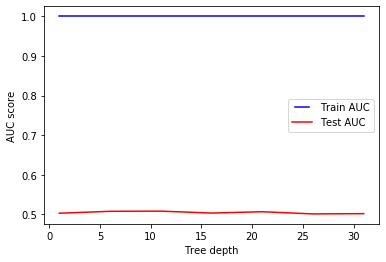

In [153]:
max_depths = np.arange(1,32,5)#where to cut the variable
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(train[y1],train[x1])#train the data
    train_pred = rf.predict(train[y1])#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train[x1], train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test[y1])
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test[x1], y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

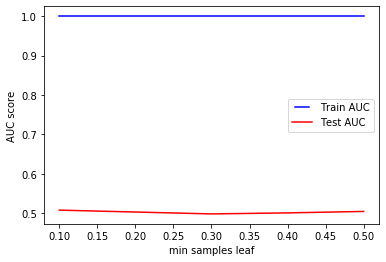

In [154]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(train[y1],train[x1])#train the data
    train_pred = rf.predict(train[y1])#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train[x1], train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test[y1])
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test[x1], y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

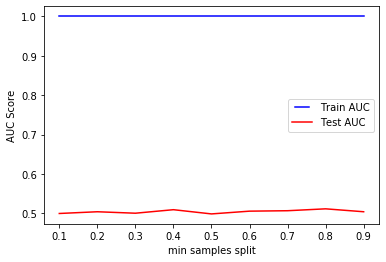

In [155]:
min_samples_splits = np.arange(0.1,1.0,0.1)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(train[y1],train[x1])#train the data
    train_pred = rf.predict(train[y1])#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train[x1], train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test[y1])
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test[x1], y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()


In [156]:
#nest=40,tree depth=2,minsam=0.10,minspl=0.2
ensemble=RandomForestClassifier(random_state=1,n_estimators=40,min_samples_split=0.2,min_samples_leaf=0.10,max_depth=2)

In [157]:
ensemble2=RandomForestClassifier(random_state=1,n_estimators=40,min_samples_split=0.2,min_samples_leaf=0.10,max_depth=2)

In [158]:
ensemble.fit(train[y1],train[x1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [159]:
print("training accuracy ",ensemble.score(train[y1],train[x1]))
print("testing accuracy ",ensemble.score(test[y1],test[x1]))

training accuracy  0.7945670628183361
testing accuracy  0.7711864406779662


In [160]:
#features selection
feature_en1=pd.DataFrame({"feature":list(train[y1].columns),"impo":ensemble.feature_importances_*100}).sort_values("impo",ascending=False)
feature_en1

,feature,impo
5,last_pymnt_amnt,18.293
4,dti,17.179
6,loan_amountin(dollar_1),16.506
1,term,12.350
512,UndergradMajor_information technology,10.045
...,...,...
172,"LOAN_AMT_$17,850.00",0.000
171,"LOAN_AMT_$17,750.00",0.000
170,"LOAN_AMT_$17,650.00",0.000
169,"LOAN_AMT_$17,600.00",0.000


In [161]:
y1

Index(['Age', 'term', 'loan_status', 'pymnt_plan', 'dti', 'last_pymnt_amnt',
       'loan_amountin(dollar_1)', 'LOAN_AMT_$1,000.00 ', 'LOAN_AMT_$1,050.00 ',
       'LOAN_AMT_$1,200.00 ',
       ...
       'TimeFullyProductive_3-months', 'TimeFullyProductive_6-months',
       'TimeFullyProductive_9-months', 'TimeFullyProductive_more than 1 year',
       'TimeFullyProductive_na', 'title_Credit card refinancing',
       'title_Debt consolidation', 'title_Other', 'title_Personal-loan',
       'title_auto-loan'],
      dtype='object', length=526)

In [ ]:
#we ahve to drop 1 variables how'z change in accuracy and features selection 
#percentage and other variables importance 

In [162]:
y2=y1.drop("last_pymnt_amnt")

In [163]:
y2

Index(['Age', 'term', 'loan_status', 'pymnt_plan', 'dti',
       'loan_amountin(dollar_1)', 'LOAN_AMT_$1,000.00 ', 'LOAN_AMT_$1,050.00 ',
       'LOAN_AMT_$1,200.00 ', 'LOAN_AMT_$1,400.00 ',
       ...
       'TimeFullyProductive_3-months', 'TimeFullyProductive_6-months',
       'TimeFullyProductive_9-months', 'TimeFullyProductive_more than 1 year',
       'TimeFullyProductive_na', 'title_Credit card refinancing',
       'title_Debt consolidation', 'title_Other', 'title_Personal-loan',
       'title_auto-loan'],
      dtype='object', length=525)

In [164]:
ensemble2.fit(train[y2],train[x1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [165]:
print("training accuracy ",ensemble2.score(train[y2],train[x1]))
print("testing accuracy ",ensemble2.score(test[y2],test[x1]))

training accuracy  0.7945670628183361
testing accuracy  0.7711864406779662


In [166]:
feature_en2=pd.DataFrame({"feature":list(train[y2].columns),"impo":ensemble2.feature_importances_*100}).sort_values("impo",ascending=False)
feature_en2

,feature,impo
520,title_Credit card refinancing,21.053
4,dti,18.217
515,TimeFullyProductive_3-months,16.565
1,term,15.667
0,Age,8.300
...,...,...
171,"LOAN_AMT_$17,850.00",0.000
170,"LOAN_AMT_$17,750.00",0.000
169,"LOAN_AMT_$17,650.00",0.000
168,"LOAN_AMT_$17,600.00",0.000


In [167]:
df_new=feature_en2[feature_en2["impo"]>=0.763]["feature"].to_list()#new data after variable selection 

In [168]:
df_new

['title_Credit card refinancing',
 'dti',
 'TimeFullyProductive_3-months',
 'term',
 'Age',
 'FormalEducation_undergraduate',
 'FormalEducation_post-graduate',
 'TimeFullyProductive_na',
 'loan_amountin(dollar_1)',
 'title_Debt consolidation']

In [169]:
new_feature_train=train[df_new]
new_feat_test=test[df_new]


In [170]:
print("new training feature ",new_feature_train.shape)
print("new testing feature ",new_feat_test.shape)
print("target train ",train[x1].shape)
print("target train ",test[x1].shape)

new training feature  (2356, 10)
new testing feature  (590, 10)
target train  (2356, 1)
target train  (590, 1)


In [171]:
ensemble3=RandomForestClassifier(random_state=1,n_estimators=40,min_samples_split=0.2,min_samples_leaf=0.10,max_depth=2)

In [172]:
ensemble3.fit(new_feature_train,train[x1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [173]:
print("training accuracy ",ensemble3.score(new_feature_train,train[x1]))
print("testing accuracy ",ensemble3.score(new_feat_test,test[x1]))

training accuracy  0.7945670628183361
testing accuracy  0.7711864406779662


In [174]:
#so many variables will be dropped but accuracy will be same now model is working fine

In [175]:
train_pred=ensemble3.predict(new_feature_train)
new_feature_train["pred_prob_1"]=ensemble3.predict_proba(new_feature_train)[:,1]
new_feature_train["actual_accountstatus"]=train[x1]
new_feature_train["predicted_accountstatus"]=train_pred

In [176]:
new_feature_train

,title_Credit card refinancing,dti,TimeFullyProductive_3-months,term,Age,FormalEducation_undergraduate,FormalEducation_post-graduate,TimeFullyProductive_na,loan_amountin(dollar_1),title_Debt consolidation,pred_prob_1,actual_accountstatus,predicted_accountstatus
2020,0,0.780,1,0,-1.708,0,0,0,-0.156,0,0.202,0,0
215,0,2.033,1,1,-0.676,1,0,0,-0.040,1,0.190,0,0
2701,0,1.057,1,1,-0.676,0,1,0,-0.387,0,0.194,0,0
997,1,-0.903,1,0,-0.676,0,1,0,1.697,0,0.191,0,0
392,1,0.896,0,0,1.389,1,0,1,0.307,0,0.191,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,-0.357,0,0,1.389,1,0,1,-1.198,0,0.235,1,0
835,1,-0.420,0,0,1.389,1,0,1,-1.082,0,0.222,0,0
1653,0,0.343,1,0,-0.676,1,0,0,0.539,1,0.198,0,0
2607,0,0.040,0,0,1.389,1,0,1,-1.221,1,0.239,1,0


In [177]:
count_values_in_column(new_feature_train,"actual_accountstatus")

,Total,Percentage
0,1872,79.46
1,484,20.54


In [178]:
count_values_in_column(new_feature_train,"predicted_accountstatus")

,Total,Percentage
0,2356,100.0


In [179]:
y_pred=ensemble3.predict(new_feat_test)
new_feat_test["pred_prob_1"]=ensemble3.predict_proba(new_feat_test)[:,1]
new_feat_test["actual_accountstatus"]=test[x1]
new_feat_test["predicted_accountstatus"]=y_pred

In [180]:
new_feat_test.head()

,title_Credit card refinancing,dti,TimeFullyProductive_3-months,term,Age,FormalEducation_undergraduate,FormalEducation_post-graduate,TimeFullyProductive_na,loan_amountin(dollar_1),title_Debt consolidation,pred_prob_1,actual_accountstatus,predicted_accountstatus
92,0,1.125,0,0,1.389,0,0,1,0.539,1,0.195,0,0
1281,0,-0.822,0,1,0.357,0,0,0,-0.451,0,0.203,0,0
224,0,-0.774,1,0,-0.159,0,1,0,0.539,1,0.204,0,0
2824,0,-0.813,0,0,-0.676,0,0,0,-0.758,1,0.218,0,0
838,1,-0.709,1,1,-1.192,0,0,0,2.276,0,0.178,0,0


In [181]:
count_values_in_column(new_feat_test,"actual_accountstatus")

,Total,Percentage
0,455,77.12
1,135,22.88


In [182]:
count_values_in_column(new_feat_test,"predicted_accountstatus")

,Total,Percentage
0,590,100.0


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [184]:
en=ensemble2.predict(train[y2])

In [185]:
train_met=metrics.confusion_matrix(train[x1],train_pred) # confusion_matrix(Actual, predicted)
print(train_met)

[[1872    0]
 [ 484    0]]


In [186]:
test_met=metrics.confusion_matrix(test[x1],y_pred) # confusion_matrix(Actual, predicted)
print(test_met)

[[455   0]
 [135   0]]


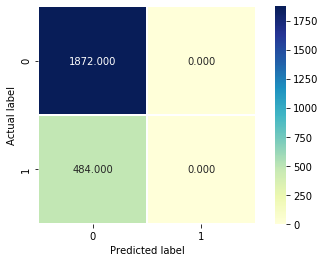

In [187]:
plt.figure(figsize=(7,4))
sns.heatmap(train_met, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

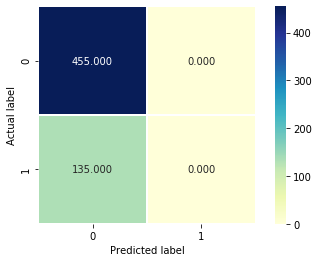

In [188]:
plt.figure(figsize=(7,4))
sns.heatmap(test_met, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [189]:
print(classification_report(test[x1], y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       455
           1       0.00      0.00      0.00       135

    accuracy                           0.77       590
   macro avg       0.39      0.50      0.44       590
weighted avg       0.59      0.77      0.67       590



In [ ]:
#calculation of f1 score 2*(prescision*recall)/(precision+recall)
#f1 score is 87%  while testing the data

In [ ]:
#######finish classification after this we have to make and new data

In [ ]:
#linear complete

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
reg=LinearRegression()

In [192]:
reg.fit(train[y1],train[x])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
reg.coef_

array([[-1.26517611e+03,  4.85927620e+02,  6.01066750e+02,
         1.87528626e+17, -1.39126151e+02, -8.73526929e+01,
         3.94345413e+14,  2.39592003e+15,  2.39363660e+15,
         2.59481526e+15,  2.37765257e+15,  6.55107982e+16,
         2.37308571e+15,  2.36851884e+15,  2.35938511e+15,
         2.35139310e+15,  1.98490216e+15,  1.98261872e+15,
         1.98147701e+15,  1.98033529e+15,  1.97919357e+15,
         1.97805186e+15,  1.97691014e+15,  1.97576843e+15,
         1.97348499e+15,  1.96777641e+15,  1.96663469e+15,
         1.96206783e+15,  1.96092611e+15,  1.95978440e+15,
         1.95521753e+15,  1.95293410e+15,  1.68471266e+16,
         1.94836723e+15, -2.45078775e+15,  1.94608380e+15,
         1.94380037e+15,  1.94265865e+15,  1.93923350e+15,
         1.93695007e+15,  1.93580835e+15,  1.93124149e+15,
         1.93009977e+15,  1.92553291e+15, -1.19702525e+16,
         1.92096604e+15,  1.91982433e+15,  1.02406785e+16,
        -7.89475574e+15,  1.91639918e+15, -4.43185239e+1

In [194]:
y_trainpred=reg.predict(train[y1])

In [195]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train[x1], y_trainpred))  
print('Mean Squared Error:', metrics.mean_squared_error(train[x1], y_trainpred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train[x1], y_trainpred)))

Mean Absolute Error: 58893.29074702886
Mean Squared Error: 3608173498.790747
Root Mean Squared Error: 60068.07387282155
